In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4)
import main
import parameters as pm
#import schemes

# Project 2




## Description of model

Ocean gyres and the Gulf Stream are important oceanic features which occur as a response to wind stress. The Gulf Stream is an example of a western boundary current in the Atlantic Ocean. In order to understand these features, a closed ocean basin subject to wind stress can be modelled. The model of Stommel (1948) is the simplest dynamical model able to represent a wind-driven circulation in a closed ocean basin, including a western boundary current. This model is described by the shallow water equations, linearised about a resting state, with linear drag and wind stress. The equations are listed below:

$$\frac{\partial \eta}{\partial t} + H \nabla . \mathbf{V}  \qquad (1)$$
$$\frac{\partial \mathbf{V}}{\partial t} + (f_0 + \beta y)\mathbf{k} \times \mathbf{V} = -g\nabla \eta - \gamma \mathbf{V} + \frac{\mathbf{\tau}}{\rho H}     \qquad (2)$$ 

where the prognostic variables are the surface elevation $\eta (\mathbf{x},t)$ and the depth-averaged horizontal velocity $\mathbf{V}(\mathbf{x},t)$. Here, $\mathbf{x}(x, y)$ is the 2D spatial coordinate and $\mathbf{k}$ is a unit vector in the vertical.

Equations (1) and (2) are subject to no-normal flow (kinematic) boundary conditions. The computational domain is a square defined by the ranges [$0,L$] $\times$ [$0,L$].

Initially the flow is at rest and velocity ($u, v$) and elevation ($\eta$) are zero throughout the domain.

The wind stress vector $\mathbf{\tau}$ is described below:

$$\tau = \begin{pmatrix} \tau_x \\ \tau_y \end{pmatrix} = \tau_0 \begin{pmatrix} -cos(\frac{\pi y}{L}) \\ 0 \end{pmatrix}  \qquad (3)$$

The variables used in the model (assigned in <i>parameters.py</i>) are described below, along with their physical interpretation:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-yw4l">Model variable</th>
    <th class="tg-yw4l">Symbol and physical interpretation</th>
  </tr>
  <tr>
    <td class="tg-yw4l">H</td>
    <td class="tg-yw4l">$H$: the resting depth of the fluid which is assumed to be constant</td>
  </tr>
  <tr>
    <td class="tg-yw4l">f0 and beta</td>
    <td class="tg-yw4l">$f_0 + \beta y$: the approximation to the Coriolis parameter on a $\beta$-plane</td>
  </tr>
  <tr>
    <td class="tg-yw4l">g</td>
    <td class="tg-yw4l">$g$: gravitational acceleration</td>
  </tr>
  <tr>
    <td class="tg-yw4l">gamma</td>
    <td class="tg-yw4l">$\gamma$: linear drag coefficient</td>
  </tr>
  <tr>
    <td class="tg-yw4l">roe</td>
    <td class="tg-yw4l">$\rho$: uniform density</td>
  </tr>
  <tr>
    <td class="tg-yw4l">tau</td>
    <td class="tg-yw4l">$\tau$: wind stress acting on the surface of the fluid</td>
  </tr>
  <tr>
    <td class="tg-yw4l">tau0</td>
    <td class="tg-yw4l">$\tau_0$: wind stress parameter</td>
  </tr>
  <tr>
    <td class="tg-yw4l">L</td>
    <td class="tg-yw4l">$L$: length of ocean basin</td>
  </tr>
  <tr>
    <td class="tg-yw4l">d</td>
    <td class="tg-yw4l">$d$: grid-length</td>
  </tr>
  <tr>
    <td class="tg-yw4l">nx</td>
    <td class="tg-yw4l">$nx$: number of points on the x and y coordinate</td>
  </tr>
  <tr>
    <td class="tg-yw4l">dt</td>
    <td class="tg-yw4l">$\Delta t$: timestep</td>
  </tr>
  <tr>
    <td class="tg-yw4l">nt</td>
    <td class="tg-yw4l">$nt$: number of timesteps</td>
  </tr>  
</table>

The values of these variables can be found in <i>parameters.py</i>. The model can be run by calling the function <i>main()</i> in <i>main.py</i>.

## Task A

According to lecture notes, the Rossby deformation radius is given by:

$$R_d = \frac{\sqrt{gH}}{f_0}  \qquad (4)$$

Using values in <i>parameters.py</i>, we have $R_d = \frac{\sqrt{10 \times 1000}}{10^{-4}} = 10^6$ (Evaluated in next cell).

In this scenario, inertia-gravity waves are considered. These waves propagate fast and the maximum wave speed that is anticipated from these waves is $141 m s^{-1}$ in the diagonal direction ($45^{\circ}$ to the x-axis and y-axis). This suggests that we may need to use fine grid to in the model ($d << R_d$).

The threshold of $\frac{R_d}{d} > 10$ is set for the fine grid regime (from lecture notes). Using $d =$ 20000 $m$, this gives $\frac{R_d}{d} = 50$, which is above the threshold.

If the maximum wave speed is 141 $m s^{-1}$ in the diagnoal direction, this means that $u_{max} = v_{max} = 100 m s^{-1}$.

The Courant-Friedrichs-Lewy (CFL) condition in 2D is shown below:

$$ C = \frac{u \Delta t}{\Delta x} + \frac{v \Delta t}{\Delta y} = \frac{u \Delta t}{d} + \frac{v \Delta t}{d} \leq 1 \qquad (5)$$

Hence, the upper bound on the timestep to use in the model can be calculated:

$$ \Delta t \leq \frac{d}{u + v} \qquad (6)$$

The above values of $d$, $u$ and $v$ results in $\Delta t \leq \frac{20000}{100 + 100} = 141 s$. Hence, the timestep $dt$ of $140s$ is used in this model.

Finally, given that the fine grid regime is used as described above, the Arakawa C-grid in space performs the best based on the comparison of the dispersion relation on the C-grid to the exact dispersion relation for inertia-gravity waves (according to lecture notes) and will be used in this model.

In [2]:
pm.calc_Rd(pm.pm['g'],pm.pm['H'],pm.pm['f0'])

1000000.0

## Task B

A finite difference model based on Equations (1) and (2) is constructed on the Arakawa C-grid in space with the forward-backward time scheme (Matsuno, 1966; Beckers and Deleersnijder, 1993). The algorithm can be found in these papers, which involve alternating the order in which the two momentum equations are solved. The model is run for a day ($\Delta t = 140s$, $nt = 618 => 86520s \approx 1$ day) below.

0
1
2
3
4
5
6
7
8
9


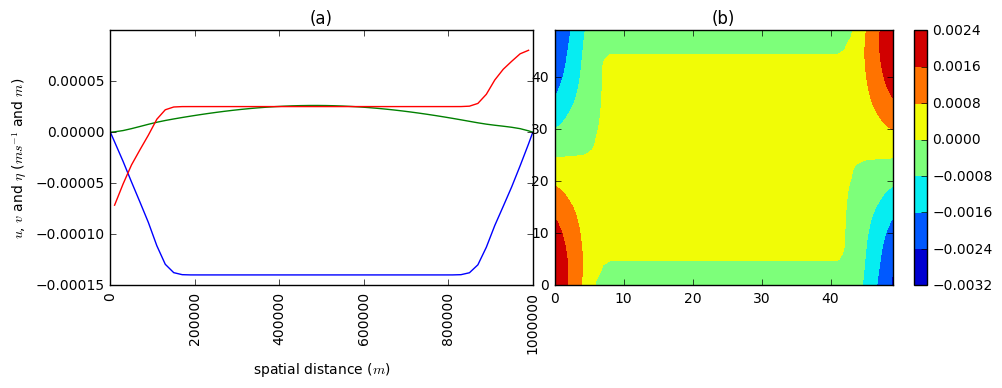

In [3]:
main.main(TaskB = True)

Figure 1: (a) Plot of $u$ against $x$ along the grid closest to the southern edge of the basin, $v$ against $y$ along the grid closest to the western edge of the basin, $\eta$ against $x$ through the middle of the gyre and (b) contour plot of $\eta$ in the ocean basin. Model is run for 1 day ($nt = 618$, $\Delta t = 140s$) with $L = 10^6$, $d = 20000m$, $H = 1000m$, $g = 10 ms^{-2}$, $\gamma = 10^{-6}s^{-1}$, $\rho = 1000 kgm^{-3}$, $\tau_0 = 0.2 Nm^{-2}$ with boundary conditions and initial conditions stated in description of model.

## Task C

0
1
2
3
4
5
6
7
8
9


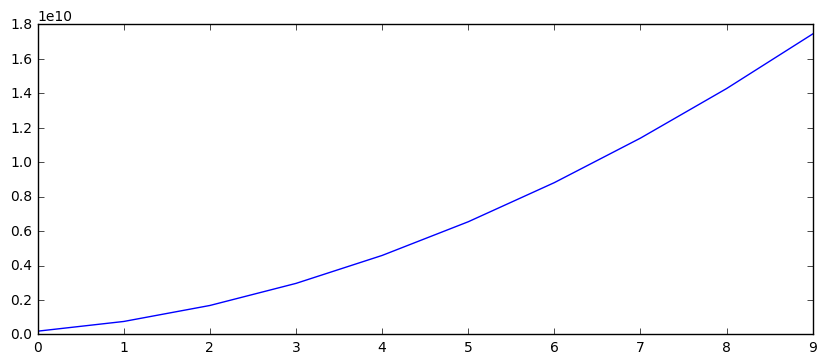

In [4]:
main.main(TaskC = True)

Figure 2: Plot of total energy from the perturbation of the resting ocean against time. Model is run for 1 day ($nt = 618$, $\Delta t = 140s$) with $L = 10^6$, $d = 20000m$, $H = 1000m$, $g = 10 ms^{-2}$, $\gamma = 10^{-6}s^{-1}$, $\rho = 1000 kgm^{-3}$, $\tau_0 = 0.2 Nm^{-2}$ with boundary conditions and initial conditions stated in description of model.

## Task D

0
1
2
3
4
5
6
7
8
9
2.96504129111e+15


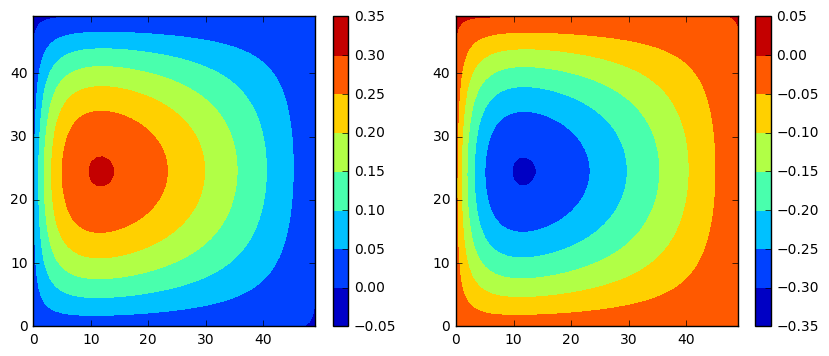

In [5]:
main.main(TaskD = True)

Figure 3: Contour plot of (a) the steady state analytic solution from Mushgrave (1985) and (b) the difference between the steady state analytic solution and the steady state model solution.

## Conclusion

In this project, a finite difference numerical model is devised using the 4th-order Runge Kutta scheme to simulate the Jin's recharge oscillator to explore the effects of non-linearity and forcing on coupled systems. The model is also used to perform an ensemble forecast to understand the ingredients for sensitivity to initial conditions and the nature of the system. 

The model is realistic in representing the physical mechanisms of the system. The model response to coupling and non-linearity is captured in Tasks A to E, showing that $T$ and $h$ have a simple recharge discharge feedback mechanism which results in an oscillation with a period of 42 months. This is similar to the observed ENSO signal which has a period varying between 3 to 5 years.

The model allows an understanding of how signal and noise are equally important in producing a realistic ENSO signal. The ensemble forecasts in Task F using the model reveals that the system is non-chaotic, as expected. Randomness in the forecast simulations can be included which leads to diverging ensemble forecasts. In reality, the ENSO system is more complex and has more degrees of freedom, which leads to chaos not captured in the model. The differences between the model and observations shows that more components such as monsoonal variability can be included to improve the forecast simulation.

## References

Galanti, E. and Tziperman, E. (2000). ENSO’s phase locking to the seasonal cycle in the fast-SST, fast-wave and mixed-mode regimes. <i>J. Atmos. Sci.</i>, 57, 2936–2950.

Jin, F.-F. (1997). An equatorial ocean recharge paradigm for ENSO: Part I: Conceptual model. <i>J. Atmos. Sci.</i>, 54, 811–829.
